# **Importing datasets**

In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.3.0
!pip install -q keras==2.4.0
!pip install -q tensorflow-estimator==2.3.0

## Imports libs
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

In [ ]:
!pip install tensorflow==2.3.0
!pip install keras==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 45 kB/s 
     |████████████████████████████████| 459 kB 66.7 MB/s 
     |████████████████████████████████| 2.9 MB 59.6 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 30.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [33]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import product, count
from matplotlib.colors import LinearSegmentedColormap
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelBinarizer  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Input, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing image datasets and adjust datas in esay way 

In [ ]:
Data_Dir = "/content/drive/MyDrive/Adane With 1000 dataset/"

# Now we call all the folder name using list form 
categories = ['class 1', 'class 2']


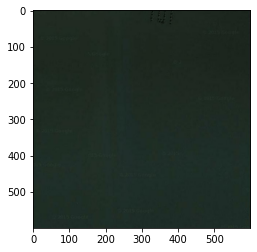

In [ ]:
# Accesing list using index order and pass to Category. 
for Category in categories:
  path = os.path.join(Data_Dir, Category)
  for img in os.listdir(path):
    image_array = cv2.imread(os.path.join(path, img))
    image_array =  cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    plt.imshow(image_array)
    plt.show()
    break
  break

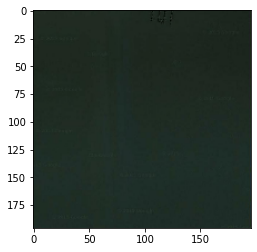

In [ ]:
Image_size = 196
new_array = cv2.resize(image_array, (Image_size, Image_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [ ]:
training_data = [] 
def creating_training_data():
  for Category in categories:
    path = os.path.join(Data_Dir, Category)
    class_num = categories.index(Category)
    for img in os.listdir(path):
      try:
        print(class_num) 
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (Image_size, Image_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        print("it will pass on", img)
        pass
            
creating_training_data()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
print(len(training_data))

1000


In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(categories[sample[1]])

class 2
class 2
class 1
class 1
class 2
class 1
class 2
class 1
class 2
class 1


In [ ]:
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
X = np.array(X).reshape(-1, Image_size, Image_size, 3)

In [ ]:
np.save("/content/drive/MyDrive/yene project dataset/Data_.npy", X)
np.save("/content/drive/MyDrive/yene project dataset/Labels_.npy",y)

In [ ]:
X = np.load("/content/drive/MyDrive/yene project dataset/Data_.npy")
print(X[1])

[[[138 138 130]
  [133 133 125]
  [146 146 138]
  ...
  [114 116 115]
  [152 154 151]
  [169 171 166]]

 [[145 145 137]
  [132 132 124]
  [134 134 126]
  ...
  [118 120 119]
  [145 148 145]
  [168 170 165]]

 [[136 136 127]
  [124 124 116]
  [128 128 119]
  ...
  [ 98 100 100]
  [169 171 168]
  [167 169 164]]

 ...

 [[190 189 184]
  [103 104  98]
  [ 98  99  94]
  ...
  [118 120 115]
  [ 55  57  52]
  [ 28  30  23]]

 [[124 124 116]
  [112 113 107]
  [ 89  90  86]
  ...
  [111 113 108]
  [166 168 163]
  [199 202 195]]

 [[ 30  30  22]
  [178 179 173]
  [141 142 137]
  ...
  [100 102  97]
  [ 94  96  91]
  [ 87  89  83]]]


# **Normalization and train_test split**

In [ ]:
Data = np.load("/content/drive/MyDrive/yene project dataset/Data_.npy")
Labels = np.load("/content/drive/MyDrive/yene project dataset/Labels_.npy")

In [ ]:
Data = Data/255.0

In [ ]:
labelb = LabelBinarizer()
Lables = labelb.fit_transform(Labels)
Labels = to_categorical(Labels)

In [ ]:
(trainX, testX, _, _) = train_test_split(Data, Labels, train_size=0.9, stratify = Labels, random_state =42)

# **Data preprocessing and adding some brightness on it**

In [ ]:
imageDataGen = ImageDataGenerator(brightness_range=[1.0,2.0])
iterator = imageDataGen.flow(trainX, batch_size=32)
tester = imageDataGen.flow(testX, batch_size=32)

Data without adding preproccesing


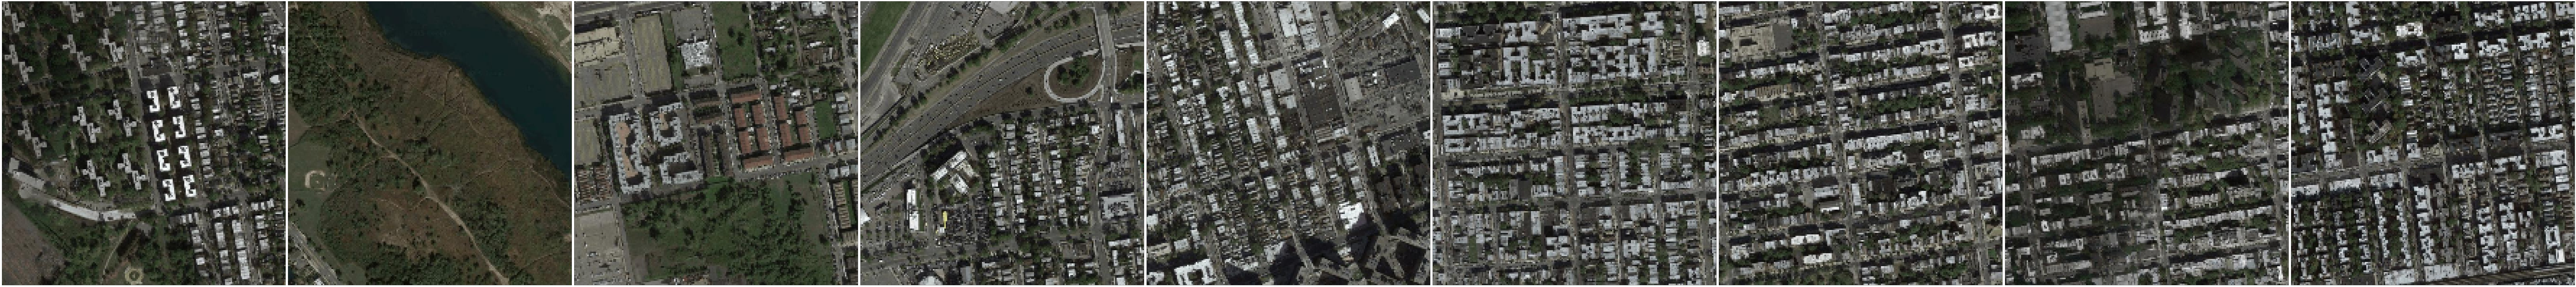

Data with brightness adding preproccesing


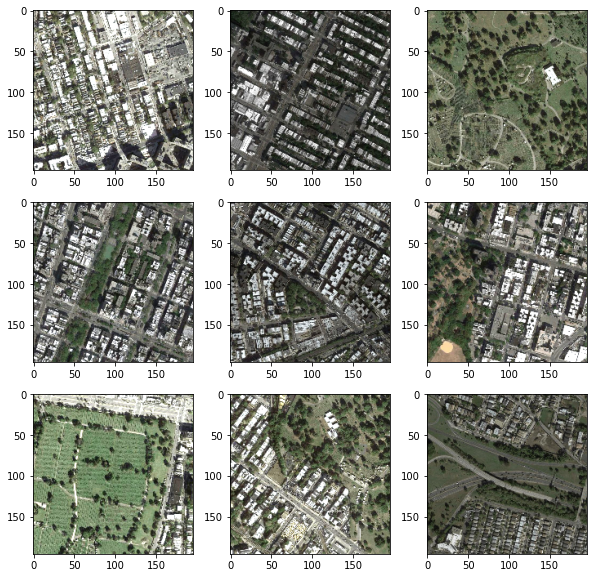

In [ ]:
print('Data without adding preproccesing')
plt.figure(figsize=(224, 224))
for i in range(9):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i], cmap='gray')
plt.tight_layout()
plt.show()
# visualize the the figure
plt.show()
print('Data with brightness adding preproccesing')
plt.figure(figsize=(10, 10))
for i in range(9):
	plt.subplot(330 + 1 + i)
	# generating images of each batch
	batch = iterator.next()
	# again we convert back to the unsigned integers value of the image for viewing
	image = batch[0].astype('uint8')
	# we plot here raw pixel data
	plt.imshow(image)
# visualize the the figure
plt.show()

# **Creating Perlin Noise** 

Indiviual image of prelin dataset shape(400, 400)
IMG prelin dataset shape(400, 400)
(400, 400, 3)


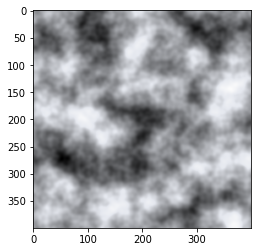

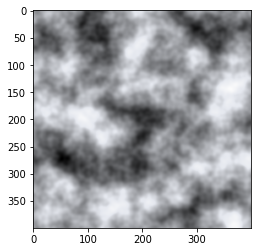

In [ ]:
def generate_unit_vectors(n):
    'Generates matrix NxN of unit length vectors'
    phi = np.random.uniform(0, 2*np.pi, (n, n))
    v = np.stack((np.cos(phi), np.sin(phi)), axis=-1)
    return v


# quintic interpolation
def qz(t):
    return t * t * t * (t * (t * 6 - 15) + 10)


# cubic interpolation
def cz(t):
    return -2 * t * t * t + 3 * t * t


def generate_2D_perlin_noise(size, ns):
    '''
    generate_2D_perlin_noise(size, ns)
    Generate 2D array of size x size filled with Perlin noise.
    Parameters
    ----------
    size : int
        Size of 2D array size x size.
    ns : int
        Distance between nodes.
    Returns
    -------
    m : ndarray
        The 2D array filled with Perlin noise.
    '''
    nc = int(size / ns)  # number of nodes
    grid_size = int(size / ns + 1)  # number of points in grid

    # generate grid of vectors
    v = generate_unit_vectors(grid_size)

    # generate some constans in advance
    ad, ar = np.arange(ns), np.arange(-ns, 0, 1)

    # vectors from each of the 4 nearest nodes to a point in the NSxNS patch
    vd = np.zeros((ns, ns, 4, 1, 2))
    for (l1, l2), c in zip(product((ad, ar), repeat=2), count()):
        vd[:, :, c, 0] = np.stack(np.meshgrid(l2, l1, indexing='xy'), axis=2)

    # interpolation coefficients
    d = qz(np.stack((np.zeros((ns, ns, 2)),
                     np.stack(np.meshgrid(ad, ad, indexing='ij'), axis=2)),
           axis=2) / ns)
    d[:, :, 0] = 1 - d[:, :, 1]
    # make copy and reshape for convenience
    d0 = d[..., 0].copy().reshape(ns, ns, 1, 2)
    d1 = d[..., 1].copy().reshape(ns, ns, 2, 1)

    # make an empy matrix
    m = np.zeros((size, size))
    # reshape for convenience
    t = m.reshape(nc, ns, nc, ns)

    # calculate values for a NSxNS patch at a time
    for i, j in product(np.arange(nc), repeat=2):  # loop through the grid
        # get four node vectors
        av = v[i:i+2, j:j+2].reshape(4, 2, 1)
        # 'vector from node to point' dot 'node vector'
        at = np.matmul(vd, av).reshape(ns, ns, 2, 2)
        # horizontal and vertical interpolation
        t[i, :, j, :] = np.matmul(np.matmul(d0, at), d1).reshape(ns, ns)

    return m

img0 = generate_2D_perlin_noise(400, 80)
img1 = generate_2D_perlin_noise(400, 40)
img2 = generate_2D_perlin_noise(400, 20)
img3 = generate_2D_perlin_noise(400, 10)

print('Indiviual image of prelin dataset shape' +str(img0.shape))
img = (img0 + img1 + img2 + img3) / 4
print('IMG prelin dataset shape' +str(img.shape))
cmap = LinearSegmentedColormap.from_list('dark',
                                        [(0, '#000000'),
                                         (0.75, '#E5E8EF'),
                                         (1, '#FCFCFC')])
img = cm.ScalarMappable(cmap=cmap).to_rgba(img)
red, green, blue, alpha = cv2.split(img)
lidi = cv2.merge((red, green, blue))
print(lidi.shape)
plt.imshow(lidi)
plt.show()
plt.imshow(img)
plt.show()

In [ ]:
from numpy.ma.core import make_mask_none
noise_add = []
train = []
print(img.shape)
print(trainX.shape)
batch = iterator.next()
image = batch[0].astype('float')
print(image.shape)
image_noise = cv2.resize(lidi, (196, 196))
print(image_noise.shape)
for eyu in range(trainX.size):
  image_noise = cv2.resize(lidi, (196, 196))
  batch = iterator.next()
  meme = batch[0].astype('uint8')
  meme = cv2.resize(meme, (196, 196))
  meme = meme / 225.0
  noiseX = cv2.addWeighted(meme, 0.25, image_noise, 0.75, 0)
  noise_add.append(noiseX)
  train.append(meme)
  if (len(noise_add) == 900):
    break

(400, 400, 4)
(900, 196, 196, 3)
(196, 196, 3)
(196, 196, 3)


In [ ]:
print(trainX.shape)
print(testX.shape)

(900, 196, 196, 3)
(100, 196, 196, 3)


In [ ]:
noise_add_tester = []
test = []
print(img.shape)
print(testX.shape)
tester_batch = tester.next()
tester_image = tester_batch[0].astype('float')
print(tester_image.shape)
image_noise = cv2.resize(lidi, (196, 196))
print(image_noise.shape)
for eyu in range(testX.size):
  image_noise = cv2.resize(lidi, (196, 196))
  tester_batch = tester.next()
  memetest = tester_batch[0].astype('uint8')
  memetest = cv2.resize(memetest, (196, 196))
  memetest = memetest / 225.0
  testnoiseX = cv2.addWeighted(memetest, 0.25, image_noise, 0.75, 0)
  noise_add_tester.append(testnoiseX)
  test.append(memetest)
  if (len(noise_add_tester) == 100):
    break

(400, 400, 4)
(100, 196, 196, 3)
(196, 196, 3)
(196, 196, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


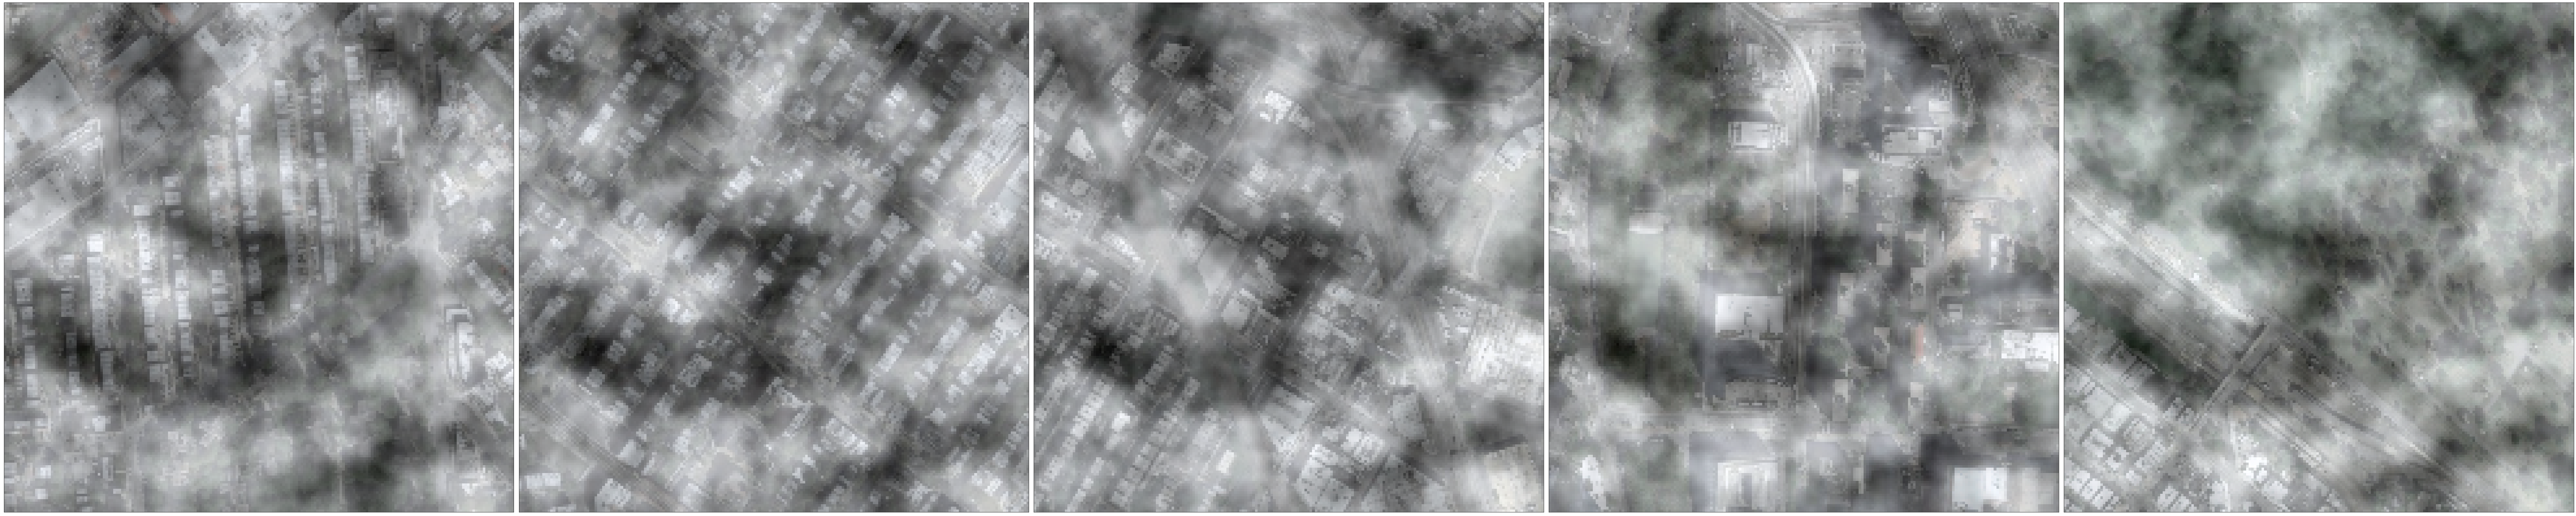

In [ ]:
plt.figure(figsize=(100, 100))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(noise_add[i], cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
Image_size = 196
train = np.array(train).reshape(-1, Image_size, Image_size, 3)
test = np.array(test).reshape(-1, Image_size, Image_size, 3)
noise_add = np.array(noise_add).reshape(-1, Image_size, Image_size, 3)
noise_add_tester = np.array(noise_add_tester).reshape(-1, Image_size, Image_size, 3)
print(noise_add_tester.shape)
print(noise_add.shape)
print(train.shape)
print(test.shape)

(100, 196, 196, 3)
(900, 196, 196, 3)
(900, 196, 196, 3)
(100, 196, 196, 3)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 16)        2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 32)        4

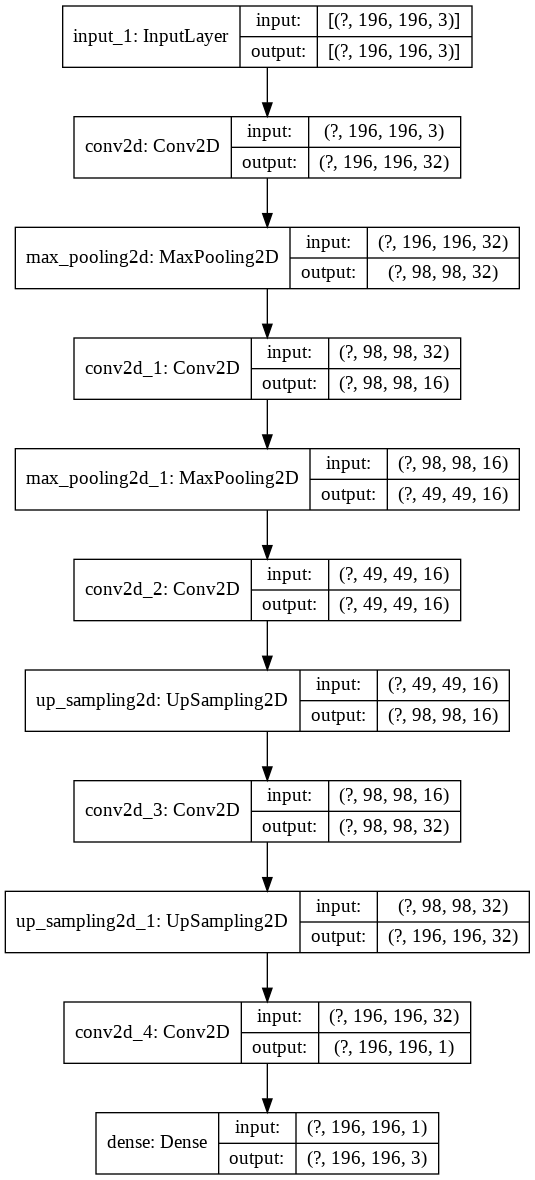

In [ ]:
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling3D, UpSampling3D, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, InputLayer
'''
model = Sequential()
model.add(ConvLSTM2D(128, (5, 5), activation = "relu", input_shape = (1, 196, 196, 3), padding="same", return_sequences=True,))
model.add(MaxPooling3D(pool_size=(1,2,2)))
model.add(ConvLSTM2D(64, (5, 5), activation = "relu", padding="same", return_sequences=True))
model.add(MaxPooling3D(pool_size=(1,2,2)))
model.add(ConvLSTM2D(128, (1, 1), padding="same", return_sequences=True, activation="relu"))
model.add(UpSampling3D((1,2,2)))
model.add(Dropout(0.2))
model.add(Conv3D(1, (3, 3, 3), padding="same", activation="sigmoid"))
model.add(UpSampling3D((1,2,2)))
model.add(Dense(3))

'''
Image_shape = (196, 196, 3)

model = Sequential()
model.add(InputLayer(Image_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))     
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.add(Dense(3, activation="sigmoid"))
#model.add(Reshape(Image_shape))

model.summary()
from tensorflow.keras import utils
utils.plot_model(model, to_file='denoising_Autoencoder.png', show_shapes=True)

In [ ]:
INIT_LR = 1e-4
EPOCHS = 3000
BS = 16
# online--> calling all datasets and train all data in one epoch.
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="mse", optimizer=opt)
# train the head of the network
print("[INFO] training head...")

[INFO] compiling model...
[INFO] training head...


In [ ]:
hist = model.fit(noise_add, train,
                epochs=EPOCHS,
                batch_size=BS,
                shuffle=True,
                validation_data=(noise_add_tester, test),)

Streaming output truncated to the last 5000 lines.
57/57 [==============================] - 2s 32ms/step - loss: 0.0346 - val_loss: 0.0407
Epoch 502/3000
57/57 [==============================] - 2s 33ms/step - loss: 0.0347 - val_loss: 0.0395
Epoch 503/3000
57/57 [==============================] - 2s 32ms/step - loss: 0.0342 - val_loss: 0.0395
Epoch 504/3000
57/57 [==============================] - 2s 33ms/step - loss: 0.0343 - val_loss: 0.0390
Epoch 505/3000
57/57 [==============================] - 2s 32ms/step - loss: 0.0343 - val_loss: 0.0395
Epoch 506/3000
57/57 [==============================] - 2s 33ms/step - loss: 0.0344 - val_loss: 0.0401
Epoch 507/3000
57/57 [==============================] - 2s 33ms/step - loss: 0.0343 - val_loss: 0.0398
Epoch 508/3000
57/57 [==============================] - 2s 32ms/step - loss: 0.0344 - val_loss: 0.0397
Epoch 509/3000
57/57 [==============================] - 2s 32ms/step - loss: 0.0343 - val_loss: 0.0396
Epoch 510/3000
57/57 [===============

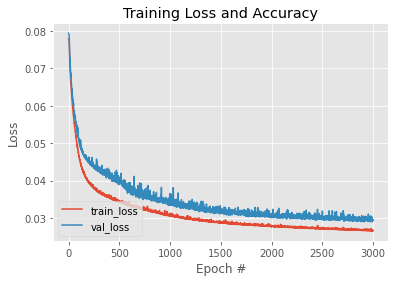

In [ ]:
N = np.arange(0, 3000)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

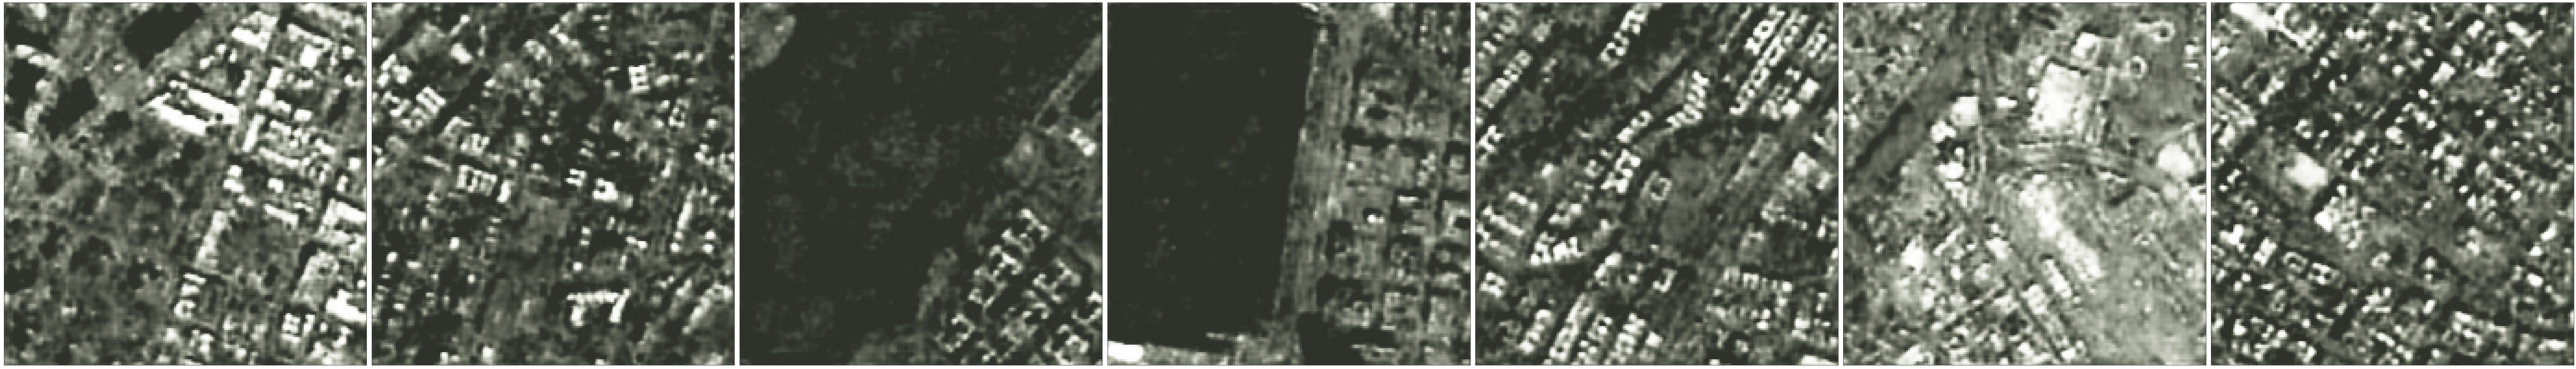

In [ ]:
pred = model.predict(noise_add_tester)
plt.figure(figsize=(100, 100))
for i in range(7):
  plt.subplot(1, 7, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(pred[i], cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/yene project dataset/3000epoch.h5')

In [34]:
import tensorflow
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/yene project dataset/3000epoch.h5')

In [112]:
import imutils
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageEnhance

def prepare(File_Path):
  Image_size = 196
  Image_array = cv2.imread(File_Path) 
  Image_array = cv2.cvtColor(Image_array, cv2.COLOR_BGR2RGB)
  new_array = cv2.resize(Image_array, (Image_size, Image_size))
  image = new_array.astype("float32") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  return image

def add_brightness(img):
  #read the image
  im = Image.open(img)
  #image brightness enhancer
  enhancer = ImageEnhance.Brightness(im)
  factor = 1.5 #brightens the image
  im_output = enhancer.enhance(factor)
  im_output.save('brightened-image.png')
img = '/content/F4.png'
add_brightness(img) 

(1, 196, 196, 3)


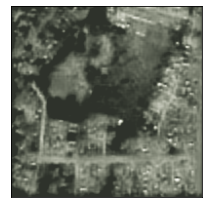

In [115]:
img = '/content/brightened-image.png'
pred = model.predict([prepare(img)])
plt.figure(figsize=(3,4))
plt.xticks([])
plt.yticks([])
plt.grid(False)
pred = np.array(pred).reshape(-1, 196, 196, 3)
print(pred.shape)
plt.imshow(pred[0], cmap='gray')
plt.tight_layout()
plt.show()